In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:\\AI PROJECT\\train_clean.csv')

# Display the first few rows of the dataset
print(df.head())

# Get a concise summary of the dataset
print(df.info())


   beds  baths    size  lot_size  zip_code      price
0     3    2.5  2590.0    6000.0     98144   795000.0
1     4    2.0  2240.0   13503.6     98106   915000.0
2     4    3.0  2040.0    3783.0     98107   950000.0
3     4    3.0  3800.0    5175.0     98199  1950000.0
4     2    2.0  1190.0   43560.0     98107   740000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      1660 non-null   int64  
 1   baths     1660 non-null   float64
 2   size      1660 non-null   float64
 3   lot_size  1660 non-null   float64
 4   zip_code  1660 non-null   int64  
 5   price     1660 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 77.9 KB
None


In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame from the previous steps

# Handle missing values if necessary
# df.fillna(method='ffill', inplace=True)  # Example method, adjust as needed

# Encode categorical variables if present (adjust based on your dataset)
# df = pd.get_dummies(df, drop_first=True)

# Standardize the features
features = df.select_dtypes(include=[np.number])  # Selecting only numeric features for standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Note: If you plan to apply models that require a target variable (e.g., GLM), ensure to define your target before splitting the data
# Example for a supervised learning setup (optional at this stage):
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['YourTargetColumnName'], test_size=0.2, random_state=42)

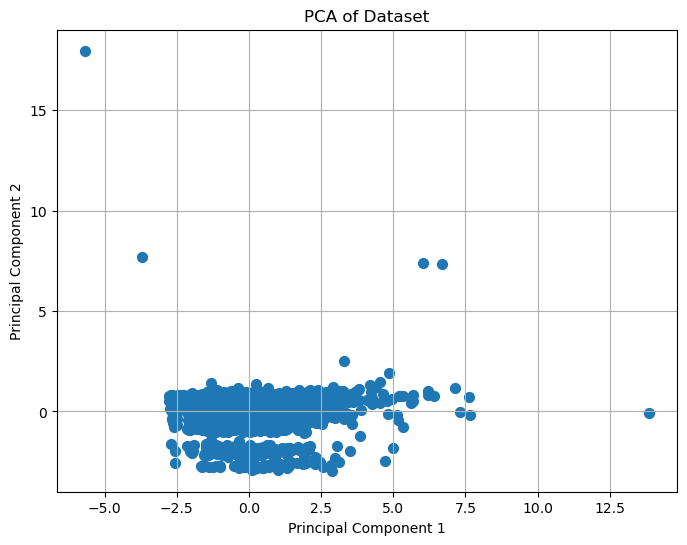

Explained variance ratio: [0.41500145 0.17459639]


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # We choose 2 for easy visualization
principalComponents = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

# Display explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

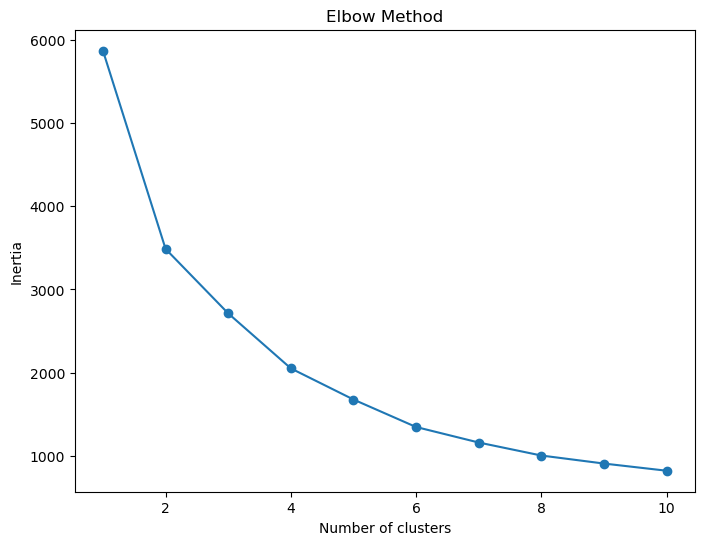

D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


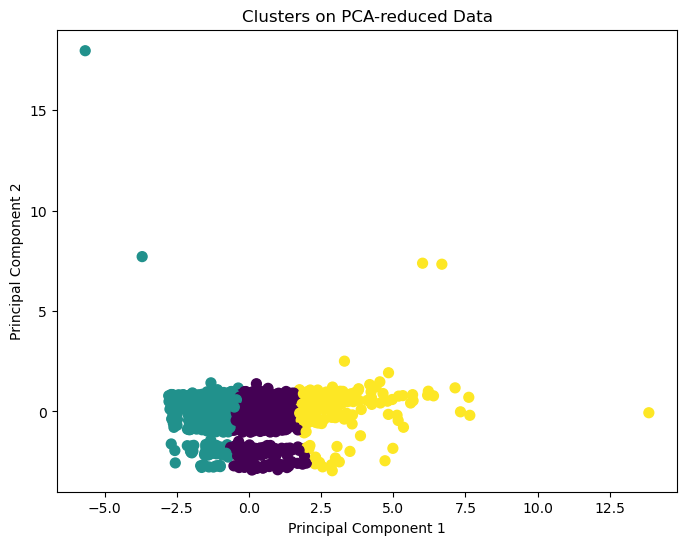

In [4]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principalComponents)  # Fit on the PCA results
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering with the chosen number of clusters
# This number should be chosen based on the Elbow plot
n_clusters = 3  # Example: Choose 3 based on the Elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(principalComponents)

# Visualize the clustering result on the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=cluster_labels, s=50, cmap='viridis')
plt.title('Clusters on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jbhay\AppData\Local\Temp\ipykernel_16932\1848239607.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train['cluster'] = kmeans.fit_predict(X)


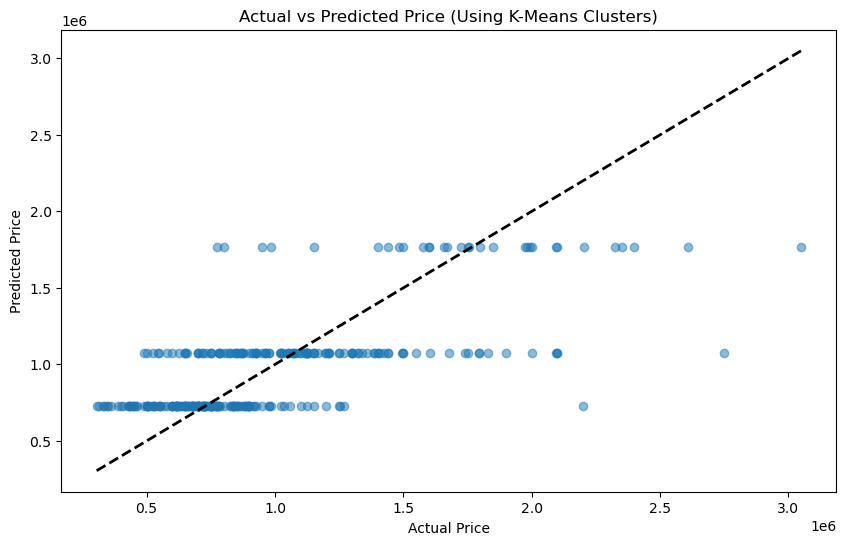

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load your dataset
df = pd.read_csv('D:\\AI PROJECT\\train_clean.csv')  # Adjust the path to your dataset

# Assuming you're applying some preprocessing, like outlier removal (as an example)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(df[['size', 'beds', 'baths', 'price']])
df_new_train = df[outliers > 0]  # Filter out the outliers

# Define X and y for K-Means
X = df_new_train[['size', 'beds', 'baths']]
y = df_new_train['price']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_new_train['cluster'] = kmeans.fit_predict(X)

# Prepare data for linear regression
X_clustered = df_new_train[['cluster']]
y = df_new_train['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.2, random_state=42)

# Convert cluster labels into dummy variables for linear regression
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['cluster'])
    ],
    remainder='passthrough'
)

# Create a pipeline
model_pipeline = make_pipeline(preprocessor, LinearRegression())

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred_cluster = model_pipeline.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cluster, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Using K-Means Clusters)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



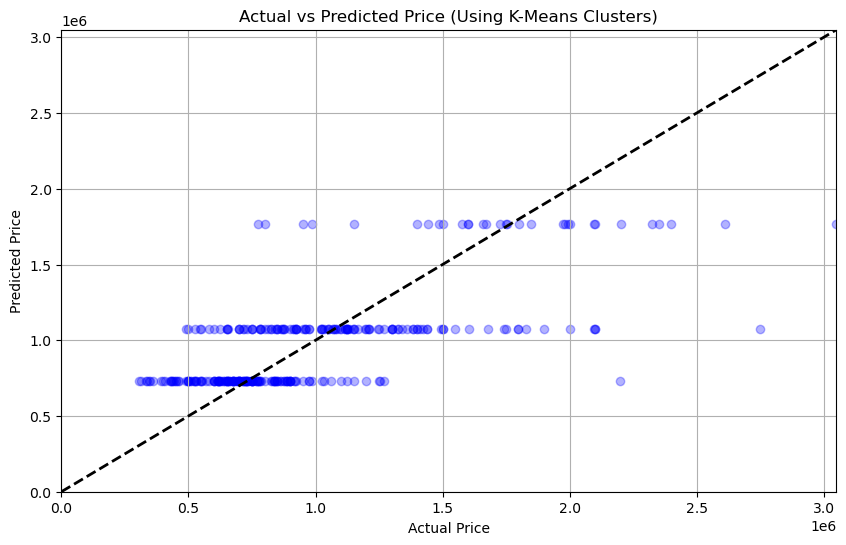

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cluster, alpha=0.3, color='blue')  # Increase alpha for less transparency if needed
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Using K-Means Clusters)')
plt.grid(True)
plt.xlim(0, max(y_test.max(), y_pred_cluster.max()))  # Set limits for x-axis
plt.ylim(0, max(y_test.max(), y_pred_cluster.max()))  # Set limits for y-axis
plt.plot([0, max(y_test.max(), y_pred_cluster.max())], [0, max(y_test.max(), y_pred_cluster.max())], 'k--', lw=2)
plt.show()


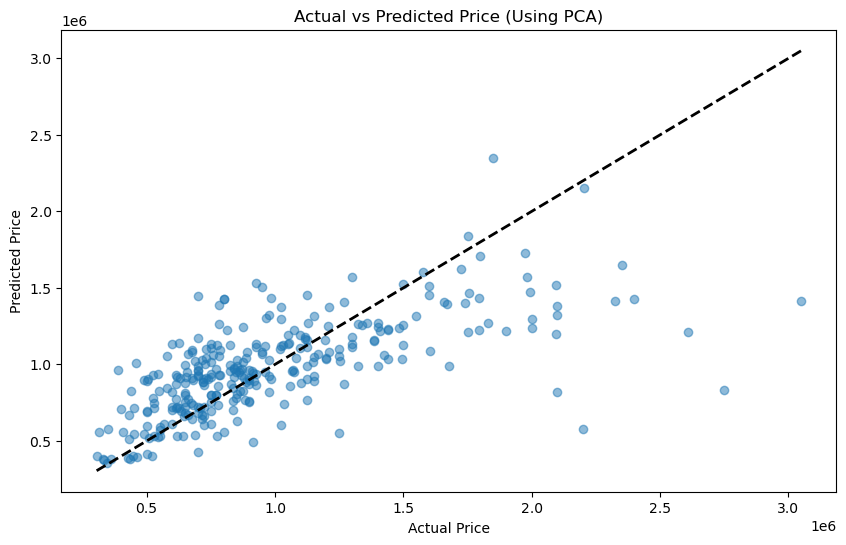

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df_new_train is your dataframe after outlier removal
features = ['size', 'beds', 'baths']
X = df_new_train[features]
y = df_new_train['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features and applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Using PCA)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
